In [7]:
import os
import sys
from pathlib import Path

repo_root = Path.cwd().parent if Path.cwd().name == "notebooks" else Path.cwd()
sys.path.append(str(repo_root))

import pandas as pd
import matplotlib.pyplot as plt

from src.data_load import load_songs, load_artists, basic_sanity_report
from src.config import SONGS_EDA_COLS, ARTISTS_EDA_COLS

In [ ]:
songs = load_songs(usecols=SONGS_EDA_COLS)
artists = load_artists(usecols=ARTISTS_EDA_COLS)

songs.head(), artists.head()

(                       id                 name           album_name  \
 0  0Prct5TDjAnEgIqbxcldY9                    !           UNDEN!ABLE   
 1  2ASl4wirkeYm3OWZxXKYuq                   !!     Childhood Dreams   
 2  5tA3ImW310llKo8EMBj2Ga  !!Noble Stabbings!!  Situationist Comedy   
 3  0fROT4kK5oTm8xO8PX6EJF       !I'll Be Back!       !I'll Be Back!   
 4  1xBFhv5faebv3mmwxx7DnS               !Lost!               !Lost!   
 
             artists  danceability  energy  key  loudness  mode  speechiness  \
 0        [HELLYEAH]         0.415   0.605    7   -11.157     1       0.0575   
 1         [Yxngxr1]         0.788   0.648    7    -9.135     0       0.3150   
 2  [Dillinger Four]         0.171   0.957    2    -5.749     1       0.1490   
 3           [Rilès]         0.823   0.612    1    -7.767     1       0.2480   
 4           [Rilès]         0.729   0.552    7    -8.562     0       0.0650   
 
    ...    tempo  duration_ms  \
 0  ...  100.059        79500   
 1  ...   79.998  

In [9]:
report = basic_sanity_report(songs, artists)
report

{'songs_rows': 550622,
 'songs_cols': ['id',
  'name',
  'album_name',
  'artists',
  'danceability',
  'energy',
  'key',
  'loudness',
  'mode',
  'speechiness',
  'acousticness',
  'instrumentalness',
  'liveness',
  'valence',
  'tempo',
  'duration_ms',
  'lyrics',
  'year',
  'genre',
  'popularity',
  'total_artist_followers',
  'avg_artist_popularity',
  'artist_ids',
  'niche_genres'],
 'songs_id_nulls': 0,
 'songs_id_duplicates': 0,
 'genre_value_counts': {'Rock': 197168,
  'Pop': 72539,
  'Electronic': 69755,
  'Folk': 50843,
  'Country': 46076,
  'Hip-Hop': 41745,
  'R&B': 27337,
  'Jazz': 17010,
  'Blues': 15976,
  'Classical': 12173},
 'danceability_out_of_range': 0,
 'energy_out_of_range': 0,
 'speechiness_out_of_range': 0,
 'acousticness_out_of_range': 0,
 'instrumentalness_out_of_range': 0,
 'liveness_out_of_range': 0,
 'valence_out_of_range': 0,
 'tempo_nonpositive': 0,
 'duration_too_short_<10s': 0,
 'duration_too_long_>30min': 43,
 'artists_rows': 71440,
 'artists_i

In [10]:
songs.dtypes

missing = songs.isna().mean().sort_values(ascending=False)
missing.head(20)

album_name          0.000036
name                0.000005
id                  0.000000
artists             0.000000
danceability        0.000000
energy              0.000000
key                 0.000000
loudness            0.000000
mode                0.000000
speechiness         0.000000
acousticness        0.000000
instrumentalness    0.000000
liveness            0.000000
valence             0.000000
tempo               0.000000
duration_ms         0.000000
lyrics              0.000000
year                0.000000
genre               0.000000
popularity          0.000000
dtype: float64

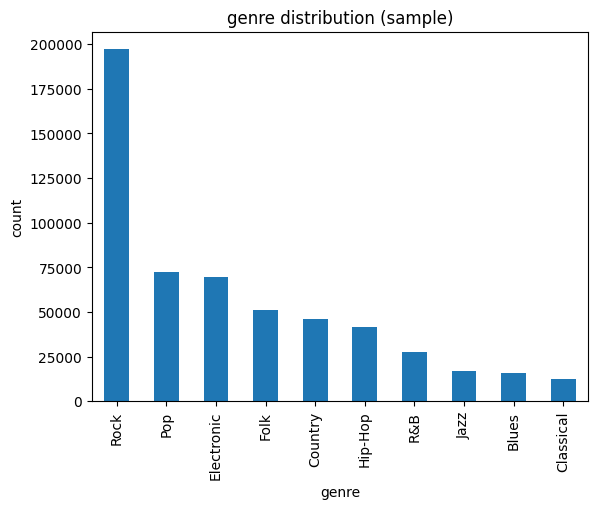

In [11]:
genre_counts = songs["genre"].value_counts()
genre_counts

plt.figure()
genre_counts.plot(kind="bar")
plt.title("genre distribution (sample)")
plt.ylabel("count")
plt.show()

In [12]:
audio_cols = ["danceability","energy","speechiness","acousticness","instrumentalness","liveness","valence","tempo","loudness","duration_ms"]
songs[audio_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
danceability,550622.0,0.527173,0.172603,0.04550,0.40800,0.530000,0.6510,0.988
energy,550622.0,0.671389,0.245591,0.00002,0.49600,0.716000,0.8860,1.000
speechiness,550622.0,0.085574,0.093337,0.02190,0.03500,0.049700,0.0922,0.966
acousticness,550622.0,0.243174,0.307418,0.00000,0.00365,0.075500,0.4320,0.996
instrumentalness,550622.0,0.107573,0.239932,0.00000,0.00000,0.000185,0.0322,0.998
liveness,550622.0,0.224043,0.196800,0.00673,0.09960,0.141000,0.2940,1.000
valence,550622.0,0.464568,0.249094,0.00000,0.25900,0.447000,0.6600,0.998
tempo,550622.0,122.815094,29.453634,30.94600,99.97800,121.729000,140.9380,245.941
loudness,550622.0,-7.877679,3.858865,-44.86800,-9.90700,-7.038000,-5.0950,0.000
duration_ms,550622.0,237411.629730,95552.726322,15027.00000,184040.00000,223000.000000,270783.0000,4995315.000
